## This is the Big Brain challenge

Today we will be attempting to make the rules and structure of a human brain.

We will use 3D matricies to represent the 3D structure of a real brain.

You must solve the following issues:
1. passing a spike from one neuron to the next.
2. passing spikes in all connection directions

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_1D_2D_brain(data, title):
    # plot as an image
    if data.dim() == 1:
        # Reshape the tensor to a 2D array with shape (1, len(data))
        data = data.unsqueeze(0)

    # convert to numpy
    data = data.numpy()
    # Remove axis ticks
    plt.xticks(ticks=range(data.shape[1]), labels=range(data.shape[1]))
    plt.yticks(ticks=range(data.shape[0]), labels=range(data.shape[0]))

    plt.imshow(data, cmap='gray', aspect='equal')

    # put the value of each pixel in the image
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f'{data[i, j]:.2f}', color='red', ha='center', va='center')

    plt.title(title)
    plt.show()

# THE 1D SCENARIO: 
We can shift spikes left and right or not at all!

In [76]:
def move_state(state, direction):
    dir_right = direction == 1  # true where there is +1, else False
    dir_left = direction == -1  # true where there is -1, else False

    state_right = state*dir_right
    state_left = state*dir_left

    # shift state_right right by 1
    state_right_new = torch.roll(state_right, shifts=1)

    # shift state_right left by 1
    state_left_new = torch.roll(state_left, shifts=-1)

    # sum them together
    new_state = state_left_new + state_right_new

    return new_state


state = torch.tensor([1, 0, 0, 1, 0, 1], dtype=torch.bool)
connections  = torch.tensor([1, 0, 1, -1, 1, -1], dtype=torch.int)
# plot_1D_2D_brain(connections, 'connections')

states = []
for time_step in range(10):
    state = move_state(state, connections)
    states.append(state)

states = torch.stack(states)
# plot_1D_2D_brain(states, '1D Brain at different time steps')

# THE 2D SCENARIO:
I can and I will

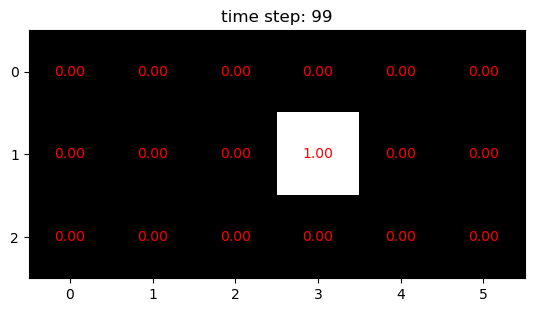

In [6]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output, display

def move_state(state, direction):
    dir_right = direction == 1  # true where there is +1, else False
    dir_left  = direction == -1  # true where there is -1, else False
    dir_up    = direction == 2  # true where there is -1, else False
    dir_down  = direction == -2  # true where there is +1, else False

    state_right = state*dir_right
    state_left  = state*dir_left
    state_up    = state*dir_up
    state_down  = state*dir_down

    state_right_new = torch.roll(state_right, shifts=1, dims=1)    # shift state_right right by 1
    state_left_new = torch.roll(state_left, shifts=-1, dims=1)    # shift state_right left by 1
    state_up_new = torch.roll(state_up, shifts=-1, dims=0)    # shift state_up up by 1
    state_down_new = torch.roll(state_down, shifts=1, dims=0)    # shift state_down down by 1

    new_state = state_left_new + state_right_new + state_up_new + state_down_new

    return new_state

state = torch.tensor([[0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0]], dtype=torch.bool)

connections  = torch.tensor([[0, 0, 0, -2, -1, -1],
                             [2, 0, 0, -2, 0, 2],
                             [0, 0, 0, 1, 1, 2]], dtype=torch.int)

states = []
for time_step in range(100):
    state_nump = state.numpy()
    plt.xticks(ticks=range(state_nump.shape[1]), labels=range(state_nump.shape[1]))    # Remove axis ticks
    plt.yticks(ticks=range(state_nump.shape[0]), labels=range(state_nump.shape[0]))
    plt.imshow(state_nump, cmap='gray', aspect='equal')

    # put the value of each pixel in the image
    for i in range(state_nump.shape[0]): 
        for j in range(state_nump.shape[1]):  plt.text(j, i, f'{state_nump[i, j]:.2f}', color='red', ha='center', va='center')

    plt.title(f"time step: {time_step}")
    # plt.show()

    clear_output(wait=True) # Clear the previous output
    display(plt.gcf())      # Display the current figure
    plt.close()             # Close the figure to prevent display overlap
    time.sleep(0.1)         # Pause for a short period of time to create an animation effect

    state = move_state(state, connections)
    states.append(state)

# plot_1D_2D_brain(connections, 'connections')

# Adding in multi-DIR pulses

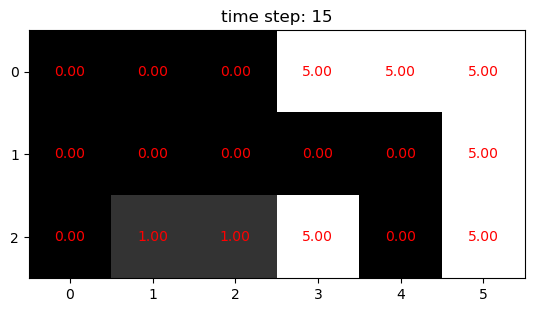

KeyboardInterrupt: 

In [51]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output, display

def move_state(state, connections_and_strength, threshold, p_spontaneous):
    # apply thresholding
    new_state = torch.zeros_like(state, dtype=state.dtype)
    indices = state >= threshold
    new_state[indices] = state[indices] - threshold[indices]
    new_state[new_state != 0] = 1.0

    state_right = new_state*connections_and_strength[0]
    state_left  = new_state*connections_and_strength[1]
    state_up    = new_state*connections_and_strength[2]
    state_down  = new_state*connections_and_strength[3]

    state_right_new = torch.roll(state_right, shifts=1, dims=1)    # shift state_right right by 1
    state_left_new = torch.roll(state_left, shifts=-1, dims=1)    # shift state_left left by 1
    state_up_new = torch.roll(state_up, shifts=-1, dims=0)    # shift state_up up by 1
    state_down_new = torch.roll(state_down, shifts=1, dims=0)    # shift state_down down by 1

    state_right_new[:, 0] = 0.0
    state_left_new[:, -1] = 0.0
    state_up_new[-1, :] = 0.0
    state_down_new[0, :] = 0.0

    new_state = state_left_new + state_right_new + state_up_new + state_down_new

    # spontaneous firing
    spontaneous_firing = torch.rand_like(new_state, dtype=torch.float32) < p_spontaneous
    new_state[spontaneous_firing] += strength[spontaneous_firing]

    return new_state

state = torch.tensor([[0.0, 0.0, 0.0, 0.0, 0.0, 10.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=torch.uint8)

threshold = torch.tensor([[9.0, 9.0, 4.0, 4.0, 4.0, 4.0],  # minumum threshold is 1.0!!! this ensures the sumultanious pulsing works!
                          [1.0, 1.0, 1.0, 4.0, 1.0, 4.0],
                          [1.0, 1.0, 1.0, 4.0, 4.0, 4.0]], dtype=torch.uint8)

connections_and_strength = [torch.tensor([[0, 0, 0, 0, 0, 0],# right # existance = connection, value = weight 
                                          [0, 0, 0, 0, 0, 0],
                                          [0, 0, 0, 5, 5, 0]], dtype=torch.uint8),
                            torch.tensor([[1, 1, 1, 1, 5, 5],# left
                                          [0, 0, 0, 0, 0, 0],
                                          [0, 0, 0, 0, 0, 0]], dtype=torch.uint8),
                            torch.tensor([[0, 0, 0, 0, 0, 0],# up
                                          [0, 0, 0, 0, 0, 5],
                                          [0, 0, 0, 0, 0, 5]], dtype=torch.uint8),
                            torch.tensor([[0, 0, 0, 5, 0, 0],# down
                                          [0, 0, 0, 5, 0, 0],
                                          [0, 0, 0, 0, 0, 0]], dtype=torch.uint8),]

# make sure to add a tensor of ones to the list of tensors
connections_and_strength.append(torch.ones_like(connections_and_strength[0]))
stacked_tensors = torch.stack(connections_and_strength)
strength = torch.max(stacked_tensors, dim=0)[0]

states = []
for time_step in range(100):
    state_nump = state.numpy()
    plt.xticks(ticks=range(state_nump.shape[1]), labels=range(state_nump.shape[1]))    # Remove axis ticks
    plt.yticks(ticks=range(state_nump.shape[0]), labels=range(state_nump.shape[0]))
    plt.imshow(state_nump, cmap='gray', aspect='equal')

    # put the value of each pixel in the image
    for i in range(state_nump.shape[0]): 
        for j in range(state_nump.shape[1]):  plt.text(j, i, f'{state_nump[i, j]:.2f}', color='red', ha='center', va='center')

    plt.title(f"time step: {time_step}")

    clear_output(wait=True) # Clear the previous output
    display(plt.gcf())      # Display the current figure
    plt.close()             # Close the figure to prevent display overlap
    time.sleep(2.0)         # Pause for a short period of time to create an animation effect

    state = move_state(state, connections_and_strength, threshold, p_spontaneous=0.1)
    states.append(state)


# Test a large one!

In [60]:
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output, display

def move_state(state, connections_and_strength, threshold, p_spontaneous):
    # apply thresholding
    new_state = torch.zeros_like(state, dtype=state.dtype)
    indices = state >= threshold
    new_state[indices] = state[indices] - threshold[indices]
    new_state[new_state != 0] = 1.0

    state_right = new_state*connections_and_strength[0]
    state_left  = new_state*connections_and_strength[1]
    state_up    = new_state*connections_and_strength[2]
    state_down  = new_state*connections_and_strength[3]

    state_right_new = torch.roll(state_right, shifts=1, dims=1)    # shift state_right right by 1
    state_left_new = torch.roll(state_left, shifts=-1, dims=1)    # shift state_left left by 1
    state_up_new = torch.roll(state_up, shifts=-1, dims=0)    # shift state_up up by 1
    state_down_new = torch.roll(state_down, shifts=1, dims=0)    # shift state_down down by 1

    state_right_new[:, 0] = 0.0
    state_left_new[:, -1] = 0.0
    state_up_new[-1, :] = 0.0
    state_down_new[0, :] = 0.0

    new_state = state_left_new + state_right_new + state_up_new + state_down_new

    # spontaneous firing
    spontaneous_firing = torch.rand_like(new_state, dtype=torch.float32) < p_spontaneous
    new_state[spontaneous_firing] += strength[spontaneous_firing]

    return new_state

shape = [100, 100]

state = torch.randint(0, 10, tuple(shape), dtype=torch.uint8)

threshold = torch.randint(0, 10, tuple(shape), dtype=torch.uint8)

connections_and_strength = [torch.randint(0, 10, tuple(shape), dtype=torch.uint8),
                            torch.randint(0, 10, tuple(shape), dtype=torch.uint8),
                            torch.randint(0, 10, tuple(shape), dtype=torch.uint8),
                            torch.randint(0, 10, tuple(shape), dtype=torch.uint8)]

# make sure to add a tensor of ones to the list of tensors
connections_and_strength.append(torch.ones_like(connections_and_strength[0]))
stacked_tensors = torch.stack(connections_and_strength)
strength = torch.max(stacked_tensors, dim=0)[0]

states = []
for time_step in range(100):

    state = move_state(state, connections_and_strength, threshold, p_spontaneous=0.1)
    states.append(state)

# 24FPS for a 1000x1000 grid (1M neurons)
# 500 fps at 100x100 grid    (10k neurons)


KeyboardInterrupt: 

# Now to start learning!
We can learn from:
- Spike Time Dependant Plasticity (Hebbian learning), where the relative timing of spikes between neurons determines whether synapses are strengthened or weakened. For example, if a presynaptic neuron fires just before a postsynaptic neuron, the connection strengthens, but if the timing is reversed, the connection weakens.
- Using rewards to learn.
- can the system be differential and use backprop? -> I think so, although maybe the randomised spontanious firing get in the way here? can we sample and use the reparameterisation trick?
- Hormones and chemistry?
- 

In [65]:
import gym
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output, display

class Brain:
    def __init__(self, shape):
        self.min_ouptut = 0
        self.max_output = 256

        self.p_spontaneous = 0.1

        self.state = torch.randint(0, 10, tuple(shape), dtype=torch.uint8)

        self.threshold = torch.randint(0, 10, tuple(shape), dtype=torch.uint8)

        self.connections_and_strength = [torch.randint(0, 10, tuple(shape), dtype=torch.uint8),
                                         torch.randint(0, 10, tuple(shape), dtype=torch.uint8),
                                         torch.randint(0, 10, tuple(shape), dtype=torch.uint8),
                                         torch.randint(0, 10, tuple(shape), dtype=torch.uint8)]

        # make sure to add a tensor of ones to the list of tensors
        connections_and_strength.append(torch.ones_like(connections_and_strength[0]))
        stacked_tensors = torch.stack(connections_and_strength)
        self.strength = torch.max(stacked_tensors, dim=0)[0]

    def step(self, input):
        # scale the input to the range of the state with min max normalization (input is -1, 1)
        input = (input[0] + 1) * 128

        self.state[:, 0] = torch.tensor(input)    # add the input to the first layer of the state

        self.state = move_state(self.state, self.connections_and_strength, self.threshold, p_spontaneous=self.p_spontaneous)
        output = self.state[-1]    # the last layer of the state is the output

        output = (output - self.min_ouptut) / (self.max_output - self.min_ouptut)        # scale the output to the range of the action space with min max normalization

        return output

    def move_state(self, state, connections_and_strength, threshold, p_spontaneous):
        # apply thresholding
        new_state = torch.zeros_like(state, dtype=state.dtype)
        indices = state >= threshold
        new_state[indices] = state[indices] - threshold[indices]
        new_state[new_state != 0] = 1.0

        state_right = new_state*connections_and_strength[0]
        state_left  = new_state*connections_and_strength[1]
        state_up    = new_state*connections_and_strength[2]
        state_down  = new_state*connections_and_strength[3]

        state_right_new = torch.roll(state_right, shifts=1, dims=1)    # shift state_right right by 1
        state_left_new = torch.roll(state_left, shifts=-1, dims=1)    # shift state_left left by 1
        state_up_new = torch.roll(state_up, shifts=-1, dims=0)    # shift state_up up by 1
        state_down_new = torch.roll(state_down, shifts=1, dims=0)    # shift state_down down by 1

        state_right_new[:, 0] = 0.0
        state_left_new[:, -1] = 0.0
        state_up_new[-1, :] = 0.0
        state_down_new[0, :] = 0.0

        new_state = state_left_new + state_right_new + state_up_new + state_down_new

        # spontaneous firing
        if p_spontaneous > 0:
            spontaneous_firing = torch.rand_like(new_state, dtype=torch.float32) < p_spontaneous
            new_state[spontaneous_firing] += self.strength[spontaneous_firing]

        return new_state

    def print_state(self, state, time_step):
        state_nump = state.numpy()
        plt.xticks(ticks=range(state_nump.shape[1]), labels=range(state_nump.shape[1]))    # Remove axis ticks
        plt.yticks(ticks=range(state_nump.shape[0]), labels=range(state_nump.shape[0]))
        plt.imshow(state_nump, cmap='gray', aspect='equal')

        # put the value of each pixel in the image
        for i in range(state_nump.shape[0]): 
            for j in range(state_nump.shape[1]):  plt.text(j, i, f'{state_nump[i, j]:.2f}', color='red', ha='center', va='center')

        plt.title(f"time step: {time_step}")

        clear_output(wait=True) # Clear the previous output
        display(plt.gcf())      # Display the current figure
        plt.close()             # Close the figure to prevent display overlap
        time.sleep(0.1)         # Pause for a short period of time to create an animation effect


# Create the CartPole environment
env = gym.make('CartPole-v1')

# Reset the environment
observation = env.reset()

# Create the brain
brain = Brain(shape=[4, 10])

for _ in range(1000):
    # Render the environment
    env.render()

    # Sample random action
    action = brain.step(observation)

    # action = env.action_space.sample()

    # Step in the environment
    observation, reward, done, info, _ = env.step(action)

    brain.print_state(brain.state, time_step)

    if done:
        break

env.close()


/home/wmandil/miniforge3/envs/ros_env/lib/python3.11/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_1D_brain(data, title):
    # plot as an image
    if data.dim() == 1:
        # Reshape the tensor to a 2D array with shape (1, len(data))
        data = data.unsqueeze(0)

    # convert to numpy
    data = data.numpy()
    # Remove axis ticks
    plt.xticks(ticks=range(data.shape[1]), labels=range(data.shape[1]))
    plt.yticks(ticks=range(data.shape[0]), labels=range(data.shape[0]))

    plt.imshow(data, cmap='gray', aspect='equal')

    # put the value of each pixel in the image
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f'{data[i, j]:.2f}', color='red', ha='center', va='center')

    plt.title(title)
    plt.show()

def move_state(state, direction):
    state = state.bool()
    direction = direction.int()
    print("state", state)
    print("direction", direction)

    # Get positions indices
    positions = torch.arange(state.size(0), device=state.device)
    print("positions = torch.arange(state.size(0), device=state.device)")
    print(positions)
    print("\n")

    # Compute new positions
    new_positions = positions + direction
    print("new_positions = positions + direction")
    print(new_positions)
    print("\n")

    # Clamp new positions to stay within valid range
    new_positions = torch.clamp(new_positions, 0, state.size(0) - 1)
    print("new_positions = torch.clamp(new_positions, 0, state.size(0) - 1)")
    print(new_positions)
    print("\n")

    # Create a mask for positions where state is True (1)
    mask = state
    print("mask = state")
    print(mask)
    print("\n")

    # Initialize new state with zeros
    new_state = torch.zeros_like(state, dtype=torch.bool)
    print("new_state = torch.zeros_like(state, dtype=torch.bool)")
    print(new_state)
    print("\n")


    # Move '1's to new positions
    new_state.index_put_((new_positions[mask],), torch.tensor(True, device=state.device), accumulate=True)
    print("new_state.index_put_((new_positions[mask],), torch.tensor(True, device=state.device), accumulate=True)")
    print(new_state)
    print("\n")

    return new_state


state = torch.tensor([1, 0, 0, 1, 0, 1], dtype=torch.bool)
connections  = torch.tensor([1, 1, 1, -1, 1, -1], dtype=torch.int)
plot_1D_brain(state, '1D Brain')
plot_1D_brain(connections, 'connections')


new_state = move_state(state, connections)
plot_1D_brain(new_state, '1D Brain')